In [292]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [293]:
df = pd.read_csv('results.csv')

In [294]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [295]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [296]:
df['date'] = pd.to_datetime(df.date)

In [297]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [298]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [299]:
df.date.dt.year

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
42894    2021
42895    2021
42896    2021
42897    2021
42898    2021
Name: date, Length: 42899, dtype: int64

In [300]:
ref_year = pd.to_datetime(1/1/2020)

In [301]:
df['Year'] = df.date.dt.year
df['Month'] = df.date.dt.month

In [302]:
df.dtypes


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
Year                   int64
Month                  int64
dtype: object

In [303]:
Team = "Thailand"
dfTeam = df[(df['home_team'] == Team)  & (df['Year'] >= 2010)]
dfTeam = dfTeam.reset_index()
dfTeam

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month
0,31998,2010-01-06,Thailand,Jordan,0,0,AFC Asian Cup qualification,Bangkok,Thailand,False,2010,1
1,32020,2010-01-17,Thailand,Singapore,1,0,King's Cup,Nakhon Ratchasima,Thailand,False,2010,1
2,32030,2010-01-20,Thailand,Poland,1,3,King's Cup,Nakhon Ratchasima,Thailand,False,2010,1
3,32379,2010-08-11,Thailand,Singapore,1,0,Friendly,Bangkok,Thailand,False,2010,8
4,32437,2010-09-04,Thailand,India,1,0,Friendly,Bangkok,Thailand,False,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...
71,41348,2019-10-10,Thailand,Congo,1,1,Friendly,Thanyaburi,Thailand,False,2019,10
72,41485,2019-10-15,Thailand,United Arab Emirates,2,1,FIFA World Cup qualification,Pathum Thani,Thailand,False,2019,10
73,42208,2021-05-29,Thailand,Tajikistan,2,2,Friendly,Sharjah,United Arab Emirates,True,2021,5
74,42249,2021-06-03,Thailand,Indonesia,2,2,FIFA World Cup qualification,Dubai,United Arab Emirates,True,2021,6


In [472]:
Team2 = "Vietnam"
dfTeam2 = df[(df['home_team'] == Team2)  & (df['Year'] >= 2010) ]
dfTeam2 = dfTeam2.reset_index()
dfTeam2

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month
0,32021,2010-01-17,Vietnam,China PR,1,2,AFC Asian Cup qualification,Hanoi,Vietnam,False,2010,1
1,32510,2010-09-24,Vietnam,North Korea,0,0,Friendly,Hanoi,Vietnam,False,2010,9
2,32680,2010-11-04,Vietnam,Singapore,1,1,VFF Cup,Hanoi,Vietnam,False,2010,11
3,32682,2010-11-06,Vietnam,North Korea,0,2,VFF Cup,Hanoi,Vietnam,False,2010,11
4,32790,2010-12-02,Vietnam,Myanmar,7,1,AFF Championship,Hanoi,Vietnam,False,2010,12
5,32802,2010-12-05,Vietnam,Philippines,0,2,AFF Championship,Hanoi,Vietnam,False,2010,12
6,32809,2010-12-08,Vietnam,Singapore,1,0,AFF Championship,Hanoi,Vietnam,False,2010,12
7,32819,2010-12-18,Vietnam,Malaysia,0,0,AFF Championship,Hanoi,Vietnam,False,2010,12
8,33257,2011-06-29,Vietnam,Macau,6,0,FIFA World Cup qualification,Ho Chi Minh City,Vietnam,False,2011,6
9,33360,2011-07-28,Vietnam,Qatar,2,1,FIFA World Cup qualification,Hanoi,Vietnam,False,2011,7


In [473]:
getgoal = dfTeam['home_score']
lostgoal = dfTeam['away_score']

In [474]:
win =0
lose =0
draw =0
for i in range (len(getgoal)):
    if(getgoal[i] > lostgoal[i]):
        win+=1
    elif(getgoal[i] < lostgoal[i]):
        lose+=1
    else:
        draw+=1
        
win,lose,draw

(38, 18, 20)

In [475]:
dfTeam['home_score'].mean()

1.5789473684210527

In [476]:
getgoal2 = dfTeam2['home_score']
lostgoal2 = dfTeam2['away_score']

In [477]:
win2 =0
lose2 =0
draw2 =0
for i in range (len(getgoal2)):
    if(getgoal2[i] > lostgoal2[i]):
        win2+=1
    elif(getgoal2[i] < lostgoal2[i]):
        lose2+=1
    else:
        draw2+=1
        
win2,lose2,draw2

(26, 13, 15)

In [478]:
a = dfTeam.home_score.value_counts().sort_index()
a2 = dfTeam2.home_score.value_counts().sort_index()
if(len(a)>len(a2)):
    low = a2
else:
    low=a 
a,a2

(0    16
 1    23
 2    23
 3     7
 4     5
 5     2
 Name: home_score, dtype: int64,
 0    15
 1    14
 2    10
 3     7
 4     3
 5     2
 6     2
 7     1
 Name: home_score, dtype: int64)

In [479]:
dfTeam.tournament.value_counts(),dfTeam2.tournament.value_counts()

(Friendly                        29
 AFF Championship                17
 FIFA World Cup qualification    16
 King's Cup                       8
 AFC Asian Cup qualification      4
 AFC Asian Cup                    2
 Name: tournament, dtype: int64,
 AFF Championship                16
 Friendly                        14
 FIFA World Cup qualification    10
 AFC Asian Cup qualification      7
 VFF Cup                          4
 AFC Asian Cup                    3
 Name: tournament, dtype: int64)

0    0
1    1
2    2
3    3
4    4
5    5
Name: home_score, dtype: int64

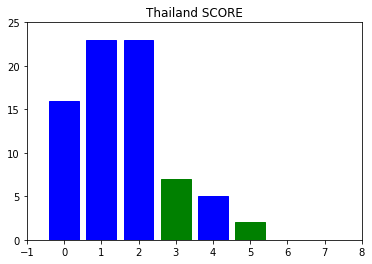

<Figure size 1440x1440 with 0 Axes>

In [480]:
b = dfTeam.home_score.value_counts().sort_index()
for i in range(len(a)):
    b[i] = i
plt.ylim([0, 25])
plt.xlim([-1, 8])
bars = plt.bar(b,a)
plt.title("Thailand SCORE")
for i in range(len(low)):
    if(a[i]>a2[i]):
        bars[i].set_color('blue') 
    elif(a[i]==a2[i]):
        bars[i].set_color('green') 
    else:
        bars[i].set_color('red') 
plt.figure(figsize=(20,20))
b

<Figure size 1440x720 with 0 Axes>

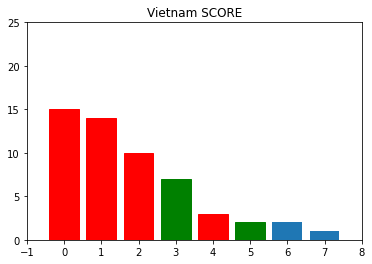

<Figure size 1440x720 with 0 Axes>

In [481]:
b2 = dfTeam2.home_score.value_counts().sort_index()
for i in range(len(a2)):
    b2[i] = i
plt.ylim([0, 25])
plt.xlim([-1, 8])
bars2 = plt.bar(b2,a2)
plt.title("Vietnam SCORE")
for i in range(len(low)):
    if(a[i]>a2[i]):
        bars2[i].set_color('red')
    elif(a[i]==a2[i]):
        bars2[i].set_color('green') 
    else:
        bars2[i].set_color('red') 
        
plt.figure(figsize=(20,10))



In [482]:
a2

0    15
1    14
2    10
3     7
4     3
5     2
6     2
7     1
Name: home_score, dtype: int64

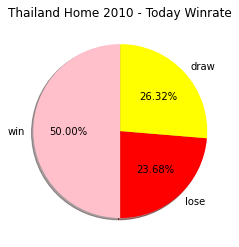

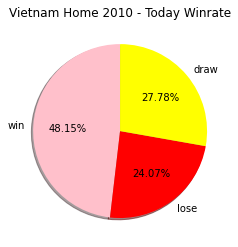

In [483]:
t = win,lose,draw
colors = ( "pink",
          "red",  "yellow")
t22 = "win" ,"lose", "draw"
plt.title("Thailand Home 2010 - Today Winrate")
plt.pie(t ,labels = t22,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors)
plt.show()

t2 = win2,lose2,draw2
p = Team2 +  " Home 2010 - Today Winrate"
plt.title(p)
plt.pie(t2, labels = t22,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors)
plt.show()
